# FIR Filter and Redesign Figures

In [1]:
% matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neo.io import NeuralynxIO
from scipy.signal import medfilt, iirfilter
from scipy import signal

In [3]:
#Load Neuralynx CSC file, specify the sessionfolder where the csc file is saved.
sessionfolder = 'D:\Hiwi\Single CSC File'
NIO = NeuralynxIO(sessiondir = sessionfolder, cachedir = sessionfolder)
block = NIO.read_block()
seg = block.segments[0]
analogsignal = seg.analogsignalarrays[0]
csc = analogsignal.magnitude

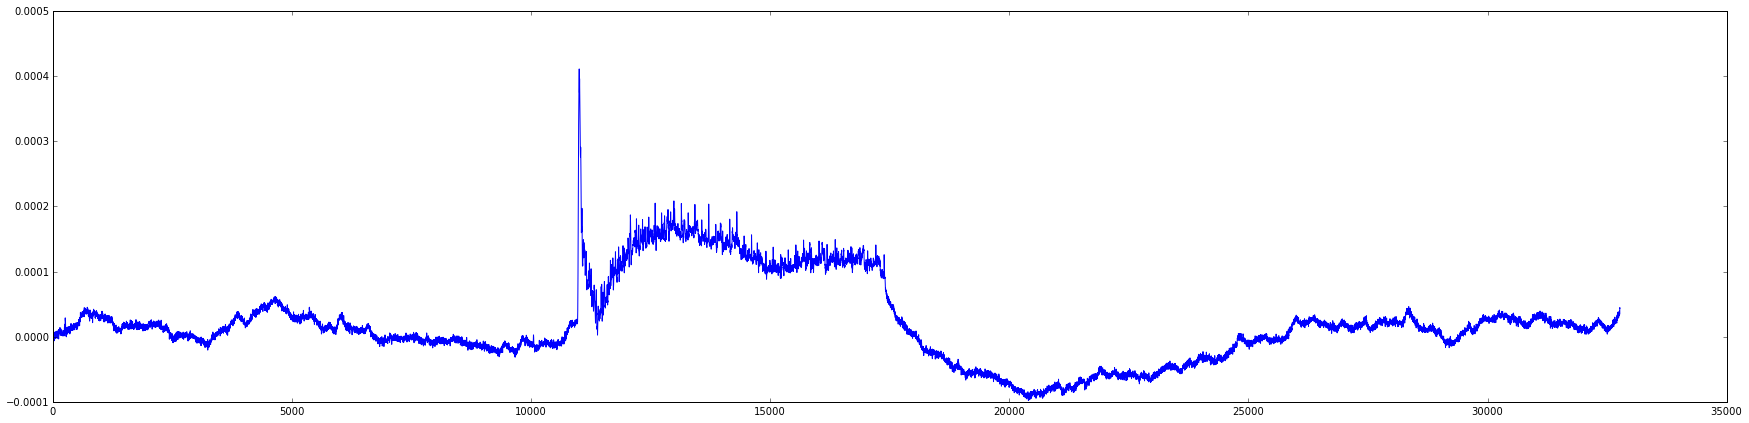

In [4]:
plt.figure(figsize=(30,7))
plt.plot(csc)

In [5]:
#Generate a median filter with window length of 53,  afterwads subtract the filtered signal 
new_medfilt_data = medfilt(csc, 53)
new_medfilt_data = csc - new_medfilt_data

In [6]:
len(csc)

32768

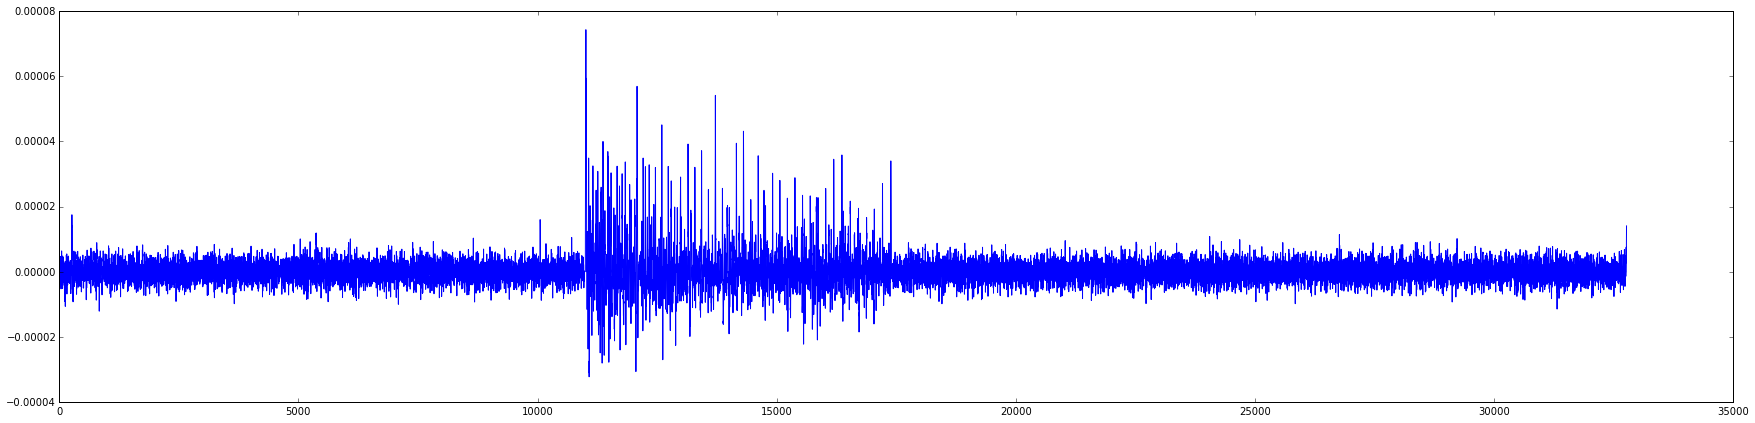

In [7]:
plt.figure(figsize=(30,7))
plt.plot(new_medfilt_data)

In [8]:
sample_rate = 32000
n_samples = len(csc)
nyq_rate = sample_rate / 2
# Quiroga: Unsupervised Spike Detection and Sorting with Wavelets and
# Superparamagnetic Clustering Bandpass from 300Hz to 6kHz
cutoff_low = 300.0/nyq_rate
cutoff_high = 6000.0 /nyq_rate
numtaps = 150
t = np.arange(n_samples) / sample_rate

In [9]:
fir_coeff = signal.firwin(numtaps,[cutoff_low,cutoff_high],pass_zero=False)

In [10]:
new_bandpass_filtered_data = signal.lfilter(fir_coeff, 1.0, csc)

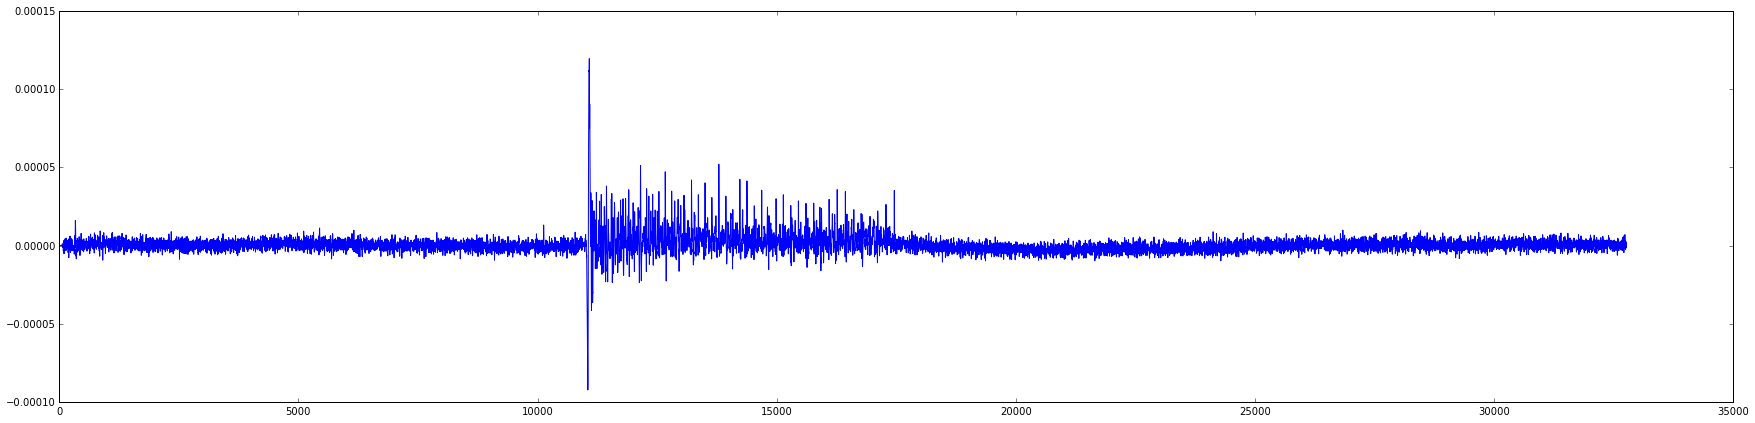

In [11]:
plt.figure(figsize=(30,7))
plt.plot(new_bandpass_filtered_data)

# Comparrison

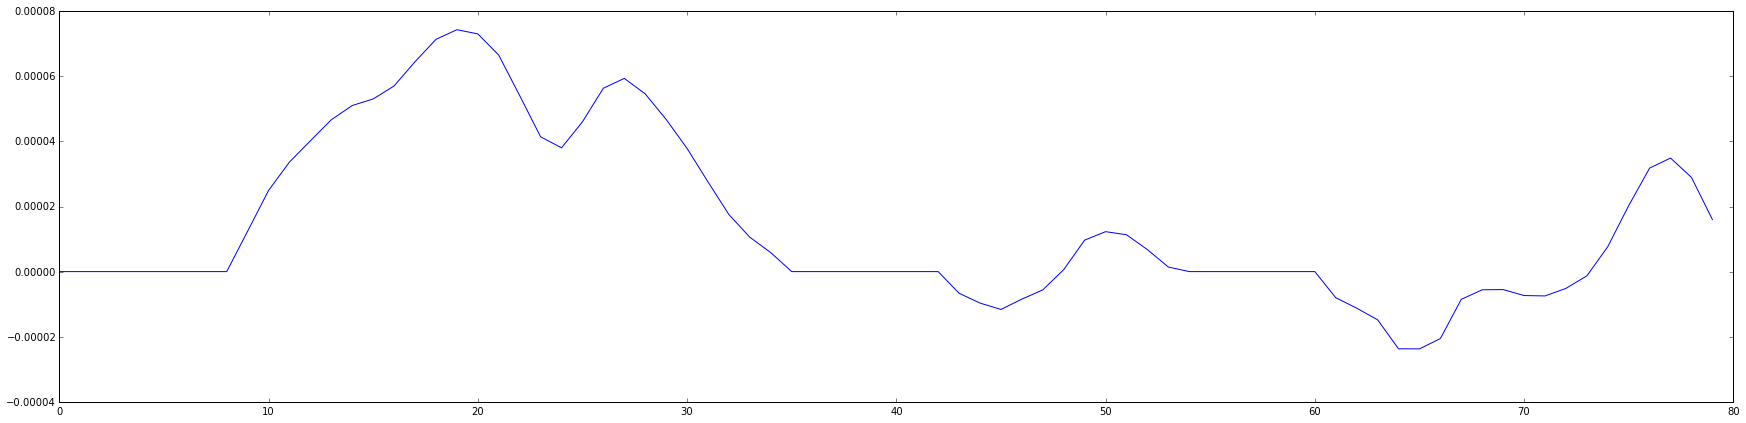

In [12]:
plt.figure(figsize=(30,7))
plt.plot(new_medfilt_data[10990:11070])

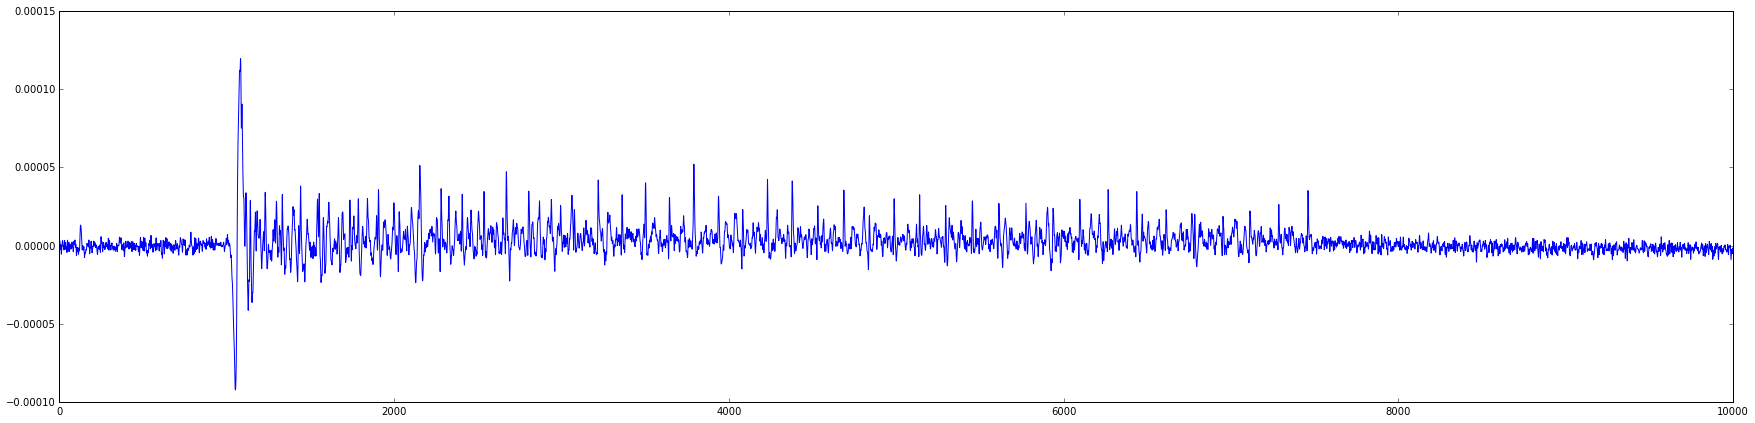

In [13]:
plt.figure(figsize=(30,7))
plt.plot(new_bandpass_filtered_data[10000:20000])

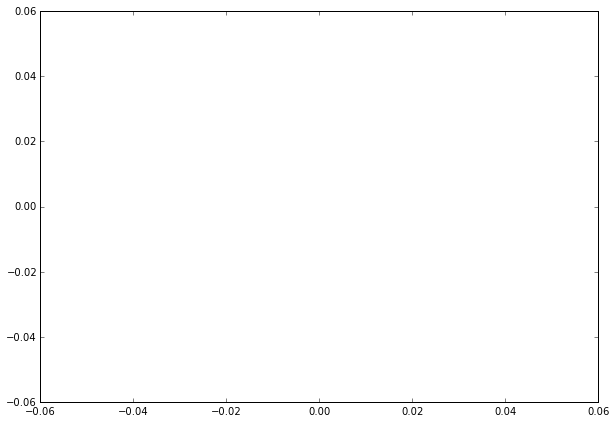

In [14]:
#Highpass filtered Signal is shifted by 75 samples.
plt.figure(figsize=(10,7))
plt.plot(csc[36000:36200])
plt.plot(new_bandpass_filtered_data[36075:36275], color = 'green')
plt.plot(new_medfilt_data[36000:36200], color = 'red')

# Highpass Filter

In [15]:
# highpass FIR filter
numtaps = 151
fir_coeff_highpass = signal.firwin(numtaps,300.0/nyq_rate, pass_zero=False)
new_highpass_filtered_data = signal.lfilter(fir_coeff_highpass, 1.0, csc)

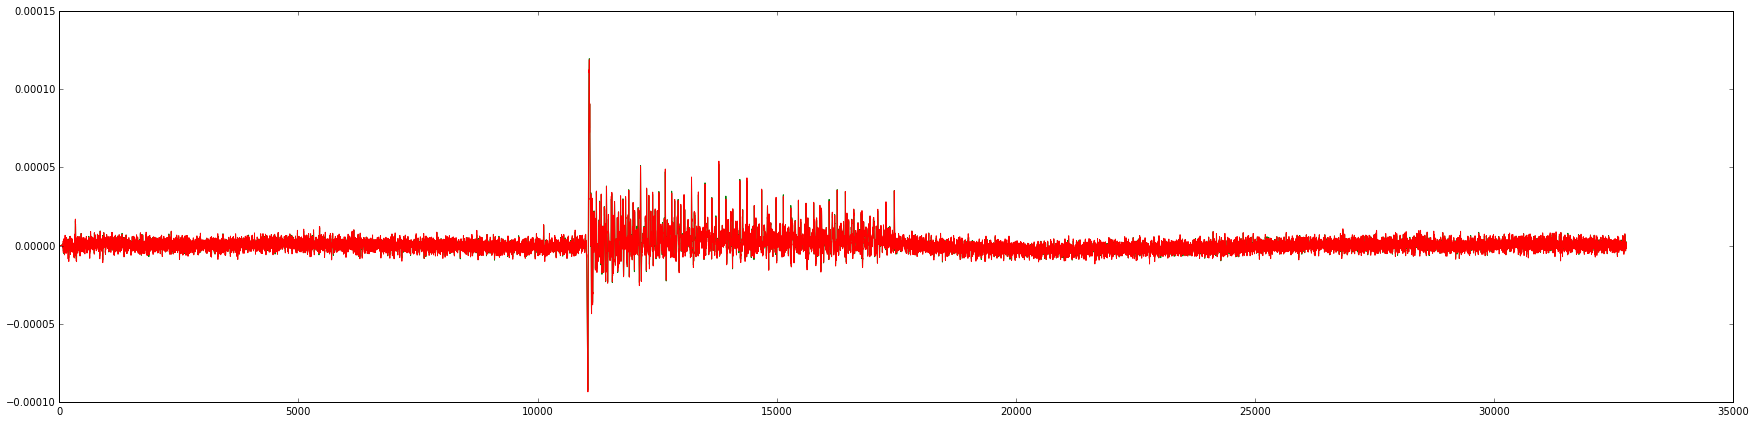

In [16]:
plt.figure(figsize=(30,7))
plt.plot(new_bandpass_filtered_data, color = 'green')
plt.plot(new_highpass_filtered_data, color = 'red')

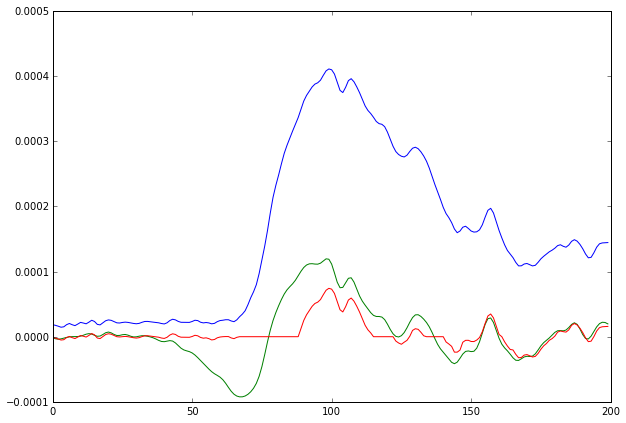

In [17]:
#Highpass filtered Signal is shifted by 75 samples.
plt.figure(figsize=(10,7))
plt.plot(csc[10910:11110])
plt.plot(new_bandpass_filtered_data[10985:11185], color = 'green')
plt.plot(new_medfilt_data[10910:11110], color = 'red')

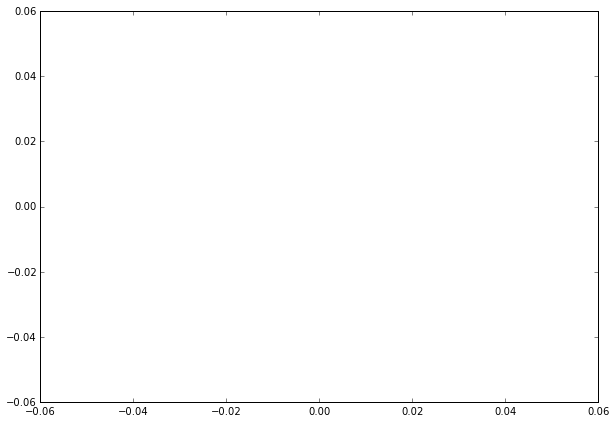

In [18]:
#Highpass filtered Signal is shifted by 75 samples.

plt.figure(figsize=(10,7))
plt.plot(csc[36000:36200])
plt.plot(new_bandpass_filtered_data[36075:36275], color = 'green')
plt.plot(new_medfilt_data[36000:36200], color = 'red')
plt.plot(new_highpass_filtered_data[36075:36275], color = "black")

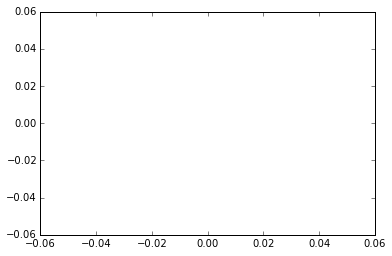

In [19]:
#Find some nice spikes
plt.plot(csc[39000:41000])
plt.plot(new_medfilt_data[39000:41000], color = "red")
plt.plot(new_bandpass_filtered_data[39075:41075])

No differences between High-pass and Band-pass filter. 

# Figure For Paper

In [22]:
from pylab import *
def parameters():
    params = {
   'axes.labelsize': 14,
   'text.fontsize': 8,
   'legend.fontsize': 15,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [20, 7]
   }
    rcParams.update(params)

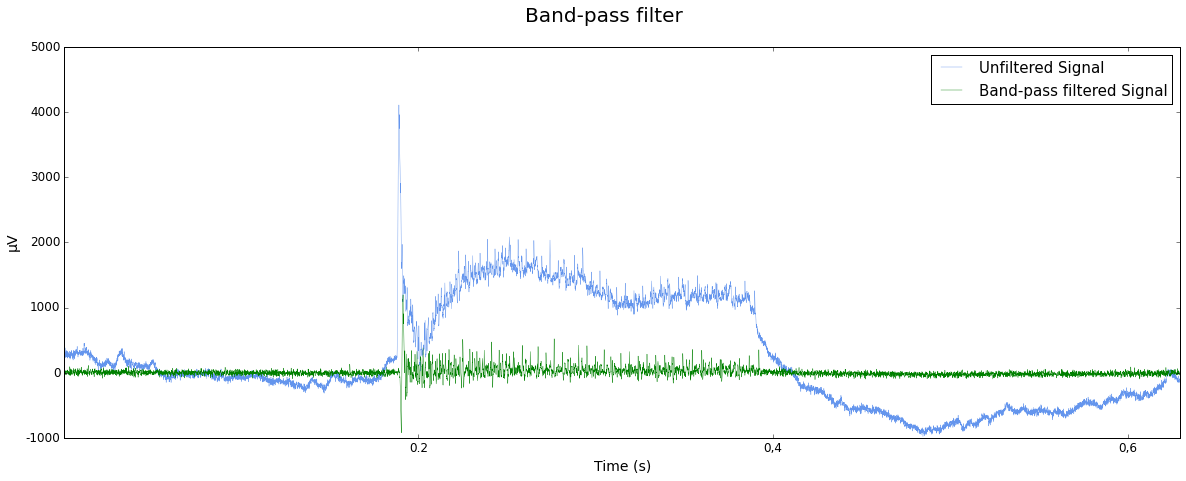

In [47]:
parameters()
plt.plot(csc[5000:25000], color = "cornflowerblue", linewidth = 0.4)
plt.plot(new_bandpass_filtered_data[5000:25000], color = 'green', linewidth = 0.4)

x = [6358, 12716, 19074]
labelsx = ["0.2", "0,4", "0,6"]

y = [-0.0001, 0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
labelsy = ["-1000", "0", "1000", "2000", "3000", "4000", "5000"]

plt.xticks(x,labelsx)
plt.yticks(y,labelsy)
plt.suptitle('Band-pass filter', fontsize = 20)
legend = plt.legend(["Unfiltered Signal", "Band-pass filtered Signal"], loc=1)
plt.xlabel("Time (s)")
plt.ylabel(u"µV")
plt.savefig("Bandpassfilter", dpi = 600, format = "jpg")

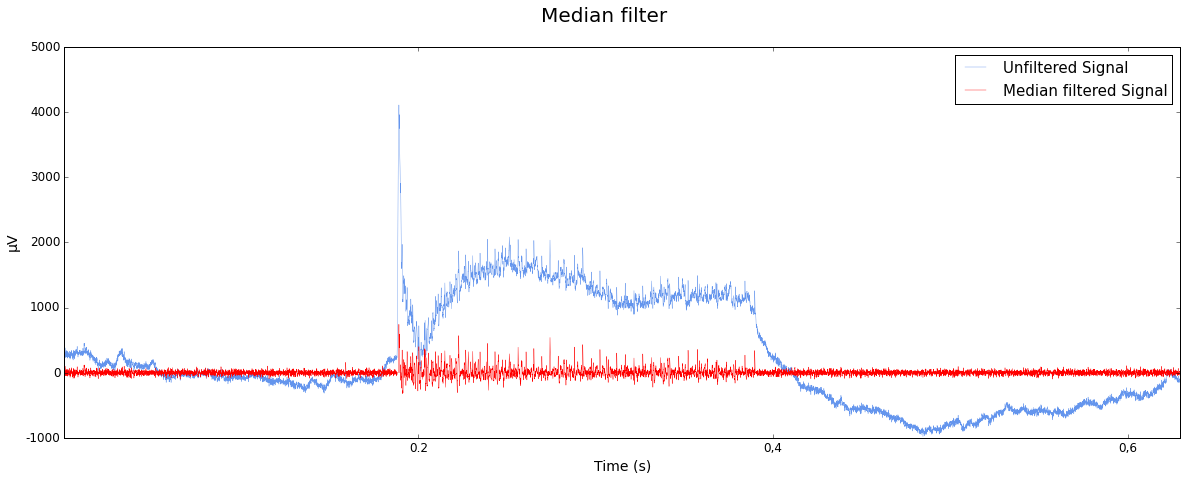

In [45]:
parameters()

plt.plot(csc[5000:25000], color = "cornflowerblue", linewidth = 0.4)
plt.plot(new_medfilt_data[5000:25000], color = 'red', linewidth = 0.4)

x = [6358, 12716, 19074]
labelsx = ["0.2", "0,4", "0,6"]

y = [-0.0001, 0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
labelsy = ["-1000", "0", "1000", "2000", "3000", "4000", "5000"]

plt.xticks(x,labelsx)
plt.yticks(y,labelsy)
plt.suptitle('Median filter', fontsize = 20)
legend = plt.legend(["Unfiltered Signal", "Median filtered Signal"], loc=1);
plt.xlabel("Time (s)")
plt.ylabel(u"µV")
plt.savefig("Medianfilter", dpi = 600, format = "jpg")

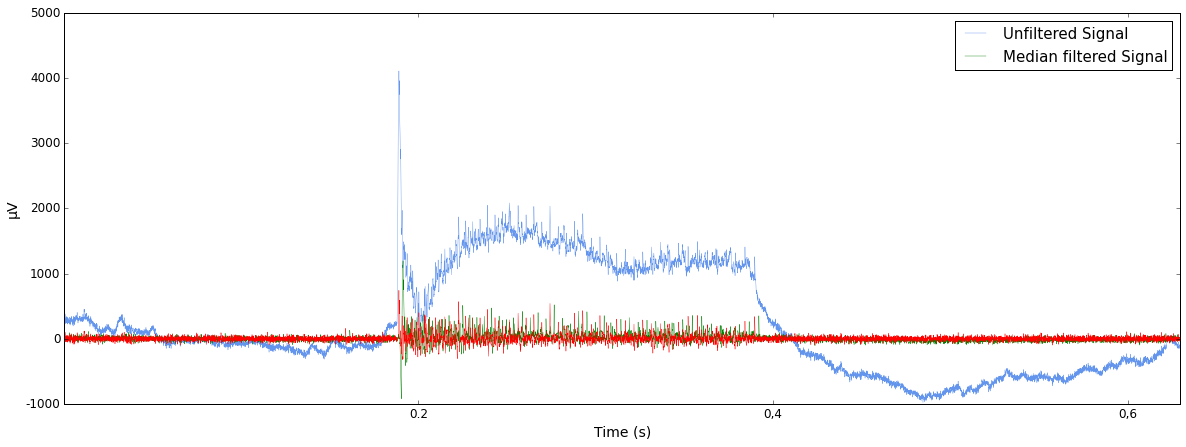

In [40]:
parameters()

plt.plot(csc[5000:25000], color = "cornflowerblue", linewidth = 0.4)
plt.plot(new_bandpass_filtered_data[5000:25000], color = 'green', linewidth = 0.4, alpha = 1)
plt.plot(new_medfilt_data[5000:25000], color = 'red', linewidth = 0.4, alpha = 1)

x = [6358, 12716, 19074]
labelsx = ["0.2", "0,4", "0,6"]

y = [-0.0001, 0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
labelsy = ["-1000", "0", "1000", "2000", "3000", "4000", "5000"]

plt.xticks(x,labelsx)
plt.yticks(y,labelsy)
legend = plt.legend(["Unfiltered Signal", "Median filtered Signal"], loc=1);
plt.xlabel("Time (s)")
plt.ylabel(u"µV")
#plt.savefig("Combinded", dpi = 600, format = "jpg")

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


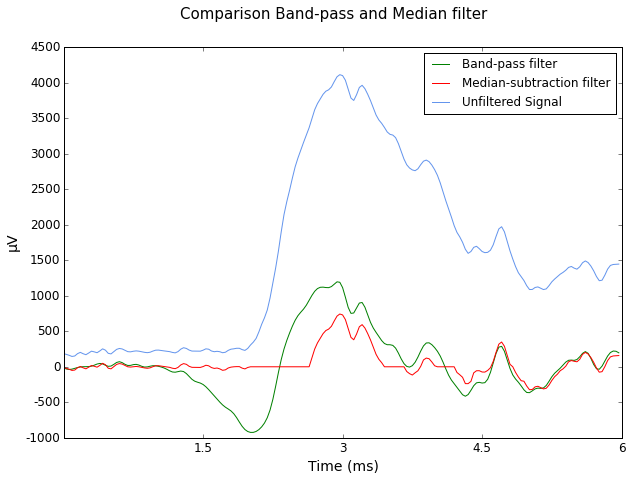

In [23]:
parameters()
plt.figure(figsize=(10,7))
x = [50, 100, 150, 200]
labelsx = ["1.5", "3", "4.5", "6"]

y = [-0.00010, -0.00005, 0, 0.00005, 0.00010, 0.00015, 0.0002, 0.00025, 0.0003, 0.00035, 0.0004, 0.00045]
labelsy = ["-1000", "-500", "0", "500", "1000", "1500", "2000", "2500", "3000", "3500", "4000", "4500"]

axes = plt.gca()
axes.set_xlim([0,200])
axes.set_ylim([0.0001,0.00045])

plt.xticks(x,labelsx)
plt.yticks(y,labelsy)
plt.suptitle('Comparison Band-pass and Median filter', fontsize = 15)

plt.xlabel("Time (ms)")
plt.ylabel(u"µV")

plt.plot(new_bandpass_filtered_data[10985:11185], color = 'green')
plt.plot(new_medfilt_data[10910:11110], color = 'red')
plt.plot(csc[10910:11110], color = "cornflowerblue")


legend = plt.legend(["Band-pass filter", "Median-subtraction filter","Unfiltered Signal"], loc=0, fontsize = 12);
plt.savefig("Comparrison", dpi = 600, format = "jpg")

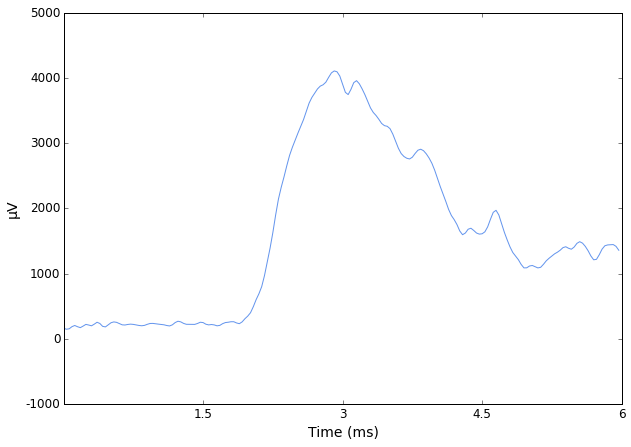

In [173]:
parameters()
plt.figure(figsize=(10,7))
plt.plot(csc[36000:36200], color = "cornflowerblue")

x = [50, 100, 150, 200]
labelsx = ["1.5", "3", "4.5", "6"]

y = [-0.0001, 0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
labelsy = ["-1000", "0", "1000", "2000", "3000", "4000", "5000"]

axes = plt.gca()
axes.set_xlim([0,200])
axes.set_ylim([0.0001,0.00045])

plt.xticks(x,labelsx)
plt.yticks(y,labelsy)


plt.xlabel("Time (ms)")
plt.ylabel(u"µV")

plt.savefig("Unfiltered Spike", dpi = 600, format = "jpg")

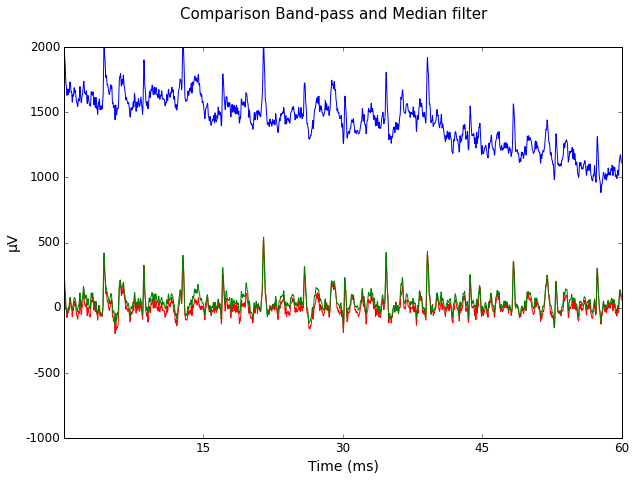

In [24]:
#Spikes
parameters()
plt.figure(figsize=(10,7))
x = [500, 1000, 1500, 2000]
labelsx = ["15", "30", "45", "60"]

y = [-0.00010, -0.00005, 0, 0.00005, 0.00010, 0.00015, 0.0002]
labelsy = ["-1000", "-500", "0", "500", "1000", "1500", "2000"]

axes = plt.gca()
axes.set_xlim([0,2000])
axes.set_ylim([-0.0001,0.00020])

plt.xticks(x,labelsx)
plt.yticks(y,labelsy)
plt.suptitle('Comparison Band-pass and Median filter', fontsize = 15)


plt.xlabel("Time (ms)")
plt.ylabel(u"µV")

plt.plot(csc[13000:15000])
plt.plot(new_medfilt_data[13000:15000], color = "red")
plt.plot(new_bandpass_filtered_data[13075:15075])

plt.savefig("Spikes B und M.jpg", dpi = 600, format = "jpg")